### Loading the libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
#loading the train file
mnist_train=pd.read_csv("train.csv")
df=pd.DataFrame(mnist_train)
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#loading the test file
mnist_test=pd.read_csv('test.csv')
df1=pd.DataFrame(mnist_test)
df1

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels=mnist_train['label']
labels

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [5]:
mnist_train.drop('label',axis=1,inplace=True)

In [6]:
mnist_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#converting to numpy array
mnist_train=mnist_train.to_numpy()
mnist_test=mnist_test.to_numpy()
labels=labels.to_numpy()

In [8]:
print("Training data:",mnist_train)
print("Testing data:",mnist_test)
print("Labels:",labels)

Training data: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Testing data: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Labels: [1 0 1 ... 7 6 9]


In [9]:
print("Training shape:",mnist_train.shape)
print("Testing shape:",mnist_test.shape)

Training shape: (42000, 784)
Testing shape: (28000, 784)


In [10]:
#converting the data from uint8 to float32
mnist_train=mnist_train.astype('float32') 
mnist_test=mnist_test.astype('float32') 
labels=labels.astype('float32')

In [11]:
print("Training data:",mnist_train)
print("Testing data:",mnist_test)
print("Labels:",labels)

Training data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels: [1. 0. 1. ... 7. 6. 9.]


In [12]:
#dividing the data into train and test
x=mnist_train
y=labels
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)

In [13]:
print(" Training data for x: ",x_train.shape)
print(" Testing data for x: ",x_test.shape)
print(" Training data for y: ",y_train.shape)
print(" Testing data for y: ",y_test.shape)

 Training data for x:  (33600, 784)
 Testing data for x:  (8400, 784)
 Training data for y:  (33600,)
 Testing data for y:  (8400,)


### KNN Classification

In [14]:
#model development,fitting and predicting
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Predicted values:",y_pred)
print("Shape:",y_pred.shape)

Predicted values: [1. 6. 8. ... 4. 4. 9.]
Shape: (8400,)


In [15]:
#accuracy of predicted model
acc=metrics.accuracy_score(y_test,y_pred)
print('Accuracy of knn model is: ',acc*100)

Accuracy of knn model is:  96.5


In [16]:
#classification report for the model
y_true = y_test
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       818
         1.0       0.95      1.00      0.97       966
         2.0       0.99      0.96      0.97       863
         3.0       0.95      0.96      0.96       875
         4.0       0.97      0.95      0.96       826
         5.0       0.95      0.96      0.96       713
         6.0       0.98      0.99      0.99       812
         7.0       0.96      0.97      0.97       855
         8.0       0.99      0.91      0.95       836
         9.0       0.94      0.95      0.94       836

    accuracy                           0.96      8400
   macro avg       0.97      0.96      0.96      8400
weighted avg       0.97      0.96      0.96      8400



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


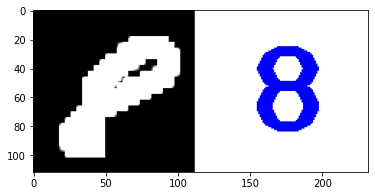

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


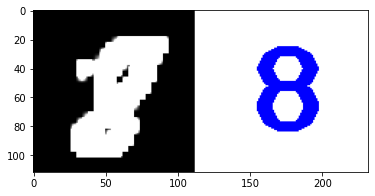

In [17]:
def draw_test(name,pred,inp_img):
    #adding border outline for the image using top,bottom,left and right values.
    output_image = cv2.copyMakeBorder(inp_img,0,0,0,120, cv2.BORDER_CONSTANT,value=1)
    output_image=cv2.cvtColor(output_image,cv2.COLOR_GRAY2BGR) #adding color to visualize the output image
    #removing the unwanted symbols 
    res=str(pred).strip('[]').strip('.')
    #adding text to the output image 
    cv2.putText(output_image,res,(150,80),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,0,255),6)
    plt.imshow(output_image)
    plt.show()
for i in range(0,2):
    #Introducing the noise in the pixel intensities of the original digits using the randint() function of numpy library. 
    #numpy.random.randint() is one of the functions for doing random sampling in NumPy. It returns an array of specified 
    #shape and fills it with random integers from low to high.
    rand=np.random.randint(0,len(x_test)) #returns 784 pixels
    inp_img=x_test[rand]
    inp_img=inp_img.reshape(28,28)  #reshaping to gray scale pixels ie 28x28
    imgL=cv2.resize(inp_img,None,fx=4,fy=4) #resizing the image to fit using fx and fy as coordinates
    res=knn.predict(inp_img.reshape(1,-1)) #reshaping it to the final pixel of 784X784
    draw_test("Predictions",res,imgL)